In [27]:
# Author: Hassan Ali
# Problem 8.1: Feature Selection Exploration and Analysis (Boston Housing Data)

# Steps:

# 1) Load and inspect the Boston dataset (Boston.csv).
# 2) Drop unnecessary columns (e.g., 'Unnamed: 0').
# 3) Perform data cleaning if needed (e.g., dropping missing values).
# 4) Define the target column ('medv') for a regression task.
# 5) Use SelectKBest (with f_regression) to select top features.
# 6) Evaluate feature importance using ExtraTreesRegressor (similar to ExtraTreesClassifier).
# 7) Compare a regression model using all features vs. only the selected features.
# 8) Print the results and comment on how close or different they are.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# For feature selection
from sklearn.feature_selection import SelectKBest, f_regression
# For feature importance (regression version of ExtraTrees)
from sklearn.ensemble import ExtraTreesRegressor
# For train/test splitting and linear regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# For evaluation
from sklearn.metrics import mean_squared_error, r2_score

# Set the matplotlib style
from matplotlib import style
style.use("ggplot")

# STEP 1: LOAD THE DATASET
b_df = pd.read_csv("Boston.csv")  # Make sure "Boston.csv" is in the working directory

print("Initial rows of the Boston dataset:")
print(b_df.head(), "\n")
print("Columns in the dataset:", b_df.columns.tolist())

# If there's an "Unnamed: 0" or similar index column, drop it
drop_cols = []
if "Unnamed: 0" in b_df.columns:
    drop_cols.append("Unnamed: 0")

# Drop any columns not needed (e.g., 'Unnamed: 0') if found
if drop_cols:
    b_df.drop(columns=drop_cols, inplace=True)

# Assume the target column is "medv" for house prices
target_col = "medv"
if target_col not in b_df.columns:
    raise KeyError(f"Target column '{target_col}' not found in the dataset.")

# STEP 2: DATA CLEANING
# If there's any negative or missing data that doesn't make sense, drop them
b_df = b_df.dropna().copy()
print(f"Shape after dropping missing: {b_df.shape}")

# STEP 3: DEFINE FEATURES AND TARGET
X = b_df.drop(columns=[target_col])
y = b_df[target_col].values

print("\nNumber of total features:", X.shape[1])
print("Feature columns:", list(X.columns))

# STEP 4: SPLIT INTO TRAINING AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# STEP 5: SELECT K BEST FEATURES
# Choosing k=8 just as an example; adjust as needed
k = 8
selector = SelectKBest(score_func=f_regression, k=k)
X_train_kbest = selector.fit_transform(X_train, y_train)
X_test_kbest = selector.transform(X_test)

# Print feature scores from f_regression
feature_scores = selector.scores_
for feat, score in zip(X.columns, feature_scores):
    print(f"Feature: {feat}, f_regression score: {score:.2f}")

# Identify which columns were selected
selected_indices = selector.get_support(indices=True)
selected_features = [X.columns[i] for i in selected_indices]
print(f"\nSelected top {k} features:", selected_features)

# STEP 6: FEATURE IMPORTANCE USING ExtraTreesRegressor
etr = ExtraTreesRegressor(n_estimators=100, random_state=42)
etr.fit(X, y)
importances = etr.feature_importances_
sorted_idx = np.argsort(importances)

print("\nFeature Importances (ExtraTreesRegressor, ascending):")
for idx in sorted_idx:
    print(f"  {X.columns[idx]}: {importances[idx]:.4f}")

# STEP 7: COMPARE REGRESSION WITH ALL FEATURES vs. SELECTED FEATURES

# (A) Regression with All Features
lr_full = LinearRegression()
lr_full.fit(X_train, y_train)
y_pred_full = lr_full.predict(X_test)
mse_full = mean_squared_error(y_test, y_pred_full)
r2_full = r2_score(y_test, y_pred_full)
print("\n--- Regression with All Features ---")
print(f"MSE (Full): {mse_full:.2f}")
print(f"R² (Full):  {r2_full:.3f}")

# (B) Regression with Selected Features
lr_kbest = LinearRegression()
lr_kbest.fit(X_train_kbest, y_train)
y_pred_kbest = lr_kbest.predict(X_test_kbest)
mse_kbest = mean_squared_error(y_test, y_pred_kbest)
r2_kbest = r2_score(y_test, y_pred_kbest)
print("\n--- Regression with Selected Features ---")
print(f"Selected Features: {selected_features}")
print(f"MSE (Reduced): {mse_kbest:.2f}")
print(f"R² (Reduced):  {r2_kbest:.3f}")

# STEP 8: COMMENT ON RESULTS
print("\nComparison of Models:")
print(f"Full-Feature Model:    MSE = {mse_full:.2f},  R² = {r2_full:.3f}")
print(f"Reduced-Feature Model: MSE = {mse_kbest:.2f}, R² = {r2_kbest:.3f}")

#
# - The difference in MSE and R² between the full-feature model and the reduced-feature model
#  shows how close or different they are. A small difference indicates the reduced set of features
#  still captures most of the predictive power.
# - If there's a large gap, might reconsider the choice of k or use a different feature selection method.
# - The ExtraTreesRegressor importances also provide insight into which features are most critical
#  for predicting 'medv'.
# - This approach aligns with the structure and style from the reference code: 
#  Using a feature selection step (SelectKBest), a feature importance approach (ExtraTrees),
#  and compare regression performance with the full vs. reduced feature sets.


Initial rows of the Boston dataset:
   Unnamed: 0     crim    zn  indus  chas    nox     rm   age     dis  rad  \
0           1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1           2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2           3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3           4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4           5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

   tax  ptratio   black  lstat  medv  
0  296     15.3  396.90   4.98  24.0  
1  242     17.8  396.90   9.14  21.6  
2  242     17.8  392.83   4.03  34.7  
3  222     18.7  394.63   2.94  33.4  
4  222     18.7  396.90   5.33  36.2   

Columns in the dataset: ['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv']
Shape after dropping missing: (506, 14)

Number of total features: 13
Feature columns: ['crim', 'zn', 'indus', 

In [29]:
# Analyzing Feature Selection and Regression Results:

# 1. Feature Selection Approach:
#   - Used SelectKBest with f_regression to pick the top 8 features:
#       ['crim', 'indus', 'nox', 'rm', 'rad', 'tax', 'ptratio', 'lstat']
#   - The f_regression scores indicate that 'rm' (average number of rooms) and 'lstat' (lower status percentage) 
#     have particularly high predictive power for 'medv'.

# 2. ExtraTreesRegressor Importance:
#   - The ExtraTreesRegressor ranked 'lstat' and 'rm' as the most critical features, aligning well with the 
#     SelectKBest results.
#   - This consistency suggests that both filter (SelectKBest) and ensemble-based (ExtraTrees) methods 
#     identify similar key predictors.

# 3. Model Performance:
#  - Full Model (all 13 features):
#     - MSE = 24.29
#     - R²  = 0.669
#   - Reduced Model (8 selected features):
#     - MSE = 26.09
#     - R²  = 0.644

#4. Comparison:
#   - The reduced model’s MSE is about 1.80 points higher, and R² is 0.025 lower than the full model.
#   - This small drop in performance indicates that removing some features does not drastically degrade 
#     predictive accuracy, suggesting that the chosen 8 features capture most of the variance.

# 5. Conclusion:
#   - While the full model yields slightly better performance, the reduced set of 8 features still 
#     maintains a reasonably strong R². 
#   - Practically, using fewer features can simplify the model and potentially reduce data collection 
#     costs, while still achieving near-optimal accuracy.



Initial rows of room-temperature.csv:
              Date  FrontLeft  FrontRight  BackLeft  BackRight
0  4/11/2010 11:30      295.2       297.0     295.8      296.3
1  4/11/2010 12:00      296.2       296.4     296.2      296.3
2  4/11/2010 12:30      297.3       297.5     296.7      297.1
3  4/11/2010 13:00      295.9       296.7     297.4      297.0
4  4/11/2010 13:30      297.2       296.5     297.6      297.4 

Columns in dataset: ['Date', 'FrontLeft', 'FrontRight', 'BackLeft', 'BackRight']
Dropping non-numeric columns: ['Date']
Shape after dropping non-numeric / missing data: (144, 4) 

Remaining numeric columns: ['FrontLeft', 'FrontRight', 'BackLeft', 'BackRight']
Sample of newly created columns:
   FrontLeft  FrontRight  BackLeft  BackRight CornerType TempCategory
0      295.2       297.0     295.8      296.3       Back       Medium
1      296.2       296.4     296.2      296.3       Back       Medium
2      297.3       297.5     296.7      297.1       Back         High
3      29

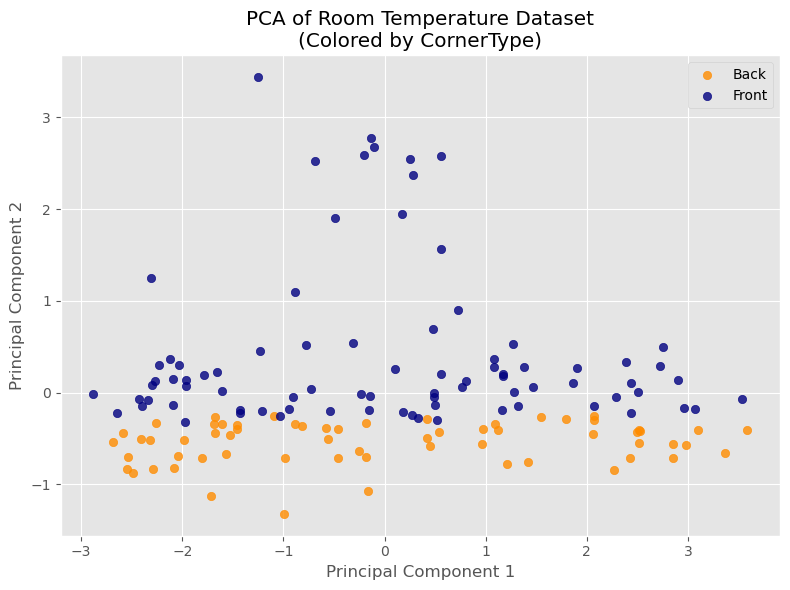

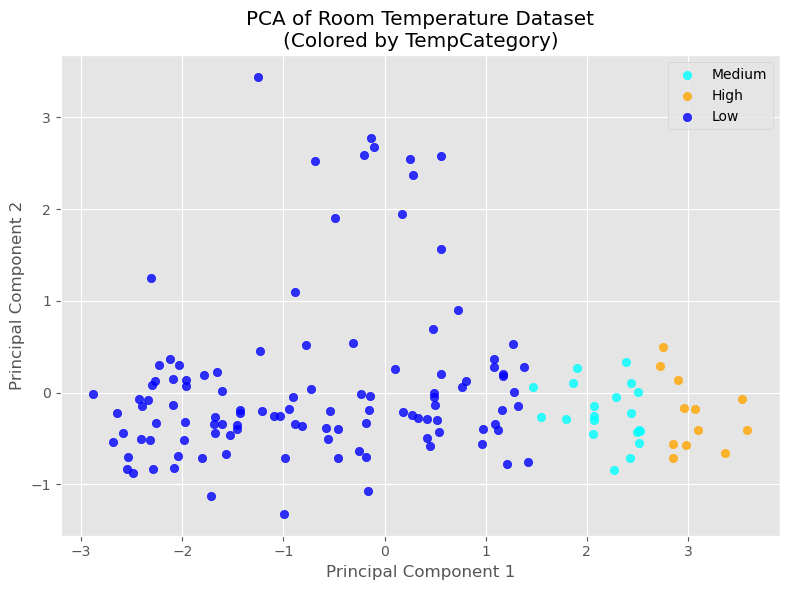

In [31]:
# Author: Hassan Ali
# Problem 8.3 (PCA)
# Dataset: room-temperature.csv (Temperature measurements from corners of a room)

# Goal:
#  1. Load and inspect the dataset (with columns: Date, FrontLeft, FrontRight, BackLeft, BackRight).
#  2. Perform PCA (2 components) to see if these 4 temperature features can be collapsed.
#  3. Create two additional columns:
#     - "CornerType" (Front vs. Back), based on average front vs. back temperatures.
#     - "TempCategory" (Low, Medium, High), based on overall average temperature.
#  4. Generate two separate color-coded scatter plots:
#     - First plot color-coded by CornerType (2 colors).
#     - Second plot color-coded by TempCategory (3 colors).
#  5. Print the explained variance ratio for the first two principal components.


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Set matplotlib style
from matplotlib import style
style.use("ggplot")

# STEP 1: LOAD THE DATASET
file_path = "room-temperature.csv"  
df = pd.read_csv(file_path)

print("Initial rows of room-temperature.csv:")
print(df.head(), "\n")
print("Columns in dataset:", df.columns.tolist())

# STEP 2: REMOVE NON-NUMERIC COLUMNS (e.g., 'Date')
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns
if len(non_numeric_cols) > 0:
    print("Dropping non-numeric columns:", list(non_numeric_cols))
    df.drop(columns=non_numeric_cols, inplace=True)

# Drop rows with missing values
df.dropna(inplace=True)
print("Shape after dropping non-numeric / missing data:", df.shape, "\n")

# Expecting columns: [FrontLeft, FrontRight, BackLeft, BackRight] as numeric
# Confirm there are exactly 4 columns left
print("Remaining numeric columns:", df.columns.tolist())

# STEP 3: ARTIFICIALLY CREATE 'CornerType' AND 'TempCategory'
# (A) CornerType: "Front" if average(FrontLeft, FrontRight) < average(BackLeft, BackRight), else "Back"
df["CornerType"] = np.where(
    ((df["FrontLeft"] + df["FrontRight"]) / 2) < ((df["BackLeft"] + df["BackRight"]) / 2),
    "Front",
    "Back"
)

# (B) TempCategory: Define an overall average temperature across all 4 corners
# Then define thresholds for Low, Medium, High
overall_avg = (df["FrontLeft"] + df["FrontRight"] + df["BackLeft"] + df["BackRight"]) / 4
conditions = [
    (overall_avg < 296),
    (overall_avg >= 296) & (overall_avg < 297),
    (overall_avg >= 297)
]
categories = ["Low", "Medium", "High"]
df["TempCategory"] = np.select(conditions, categories, default="Medium")  # default if needed

print("Sample of newly created columns:")
print(df[["FrontLeft", "FrontRight", "BackLeft", "BackRight", "CornerType", "TempCategory"]].head())

# STEP 4: PREPARE DATA FOR PCA
# Convert the 4 numeric columns to a NumPy array
X_ = df[["FrontLeft", "FrontRight", "BackLeft", "BackRight"]].values
print("Shape of numeric feature matrix (for PCA):", X_.shape)

# Standardize the data
X = StandardScaler().fit_transform(X_)

# STEP 5: PCA WITH 2 COMPONENTS
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
print("\nExplained variance ratio (first two components):", pca.explained_variance_ratio_)

# Create a DataFrame for easy plotting
df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca["CornerType"] = df["CornerType"].values
df_pca["TempCategory"] = df["TempCategory"].values

# STEP 6: FIRST PLOT (COLOR-CODED BY CORNERTYPE, 2 COLORS)
plt.figure(figsize=(8,6))
corner_colors = {"Front": "navy", "Back": "darkorange"}
for corner_val in df_pca["CornerType"].unique():
    mask = (df_pca["CornerType"] == corner_val)
    plt.scatter(df_pca.loc[mask, "PC1"],
                df_pca.loc[mask, "PC2"],
                color=corner_colors.get(corner_val, "gray"),
                alpha=0.8, label=corner_val)

plt.title("PCA of Room Temperature Dataset\n(Colored by CornerType)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

# STEP 7: SECOND PLOT (COLOR-CODED BY TEMPCATEGORY, 3 COLORS)
plt.figure(figsize=(8,6))
category_colors = {"Low": "blue", "Medium": "cyan", "High": "orange"}
for cat_val in df_pca["TempCategory"].unique():
    mask = (df_pca["TempCategory"] == cat_val)
    plt.scatter(df_pca.loc[mask, "PC1"],
                df_pca.loc[mask, "PC2"],
                color=category_colors.get(cat_val, "gray"),
                alpha=0.8, label=cat_val)

plt.title("PCA of Room Temperature Dataset\n(Colored by TempCategory)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(loc="best")
plt.tight_layout()
plt.show()


# - Artificially created two categorical columns:
#    1) 'CornerType' (Front/Back) based on average front vs. back temperatures.
#    2) 'TempCategory' (Low/Medium/High) based on overall average temperature across corners.
#  After standardizing, applied PCA (2 components).
# - The explained_variance_ratio_ shows how much variance is captured by the first two PCs.
# - Generated two separate scatter plots:
#    • One color-coded by CornerType (navy vs. darkorange).
#    • One color-coded by TempCategory (blue, cyan, orange).
# - This approach follows the style of the Wine PCA example with multiple colors for different classes.


In [32]:
# Analyzing PCA on Room Temperature Data:

# 1. Dataset Shape & Columns
#   - After removing the 'Date' column (non-numeric) and dropping any missing rows, 144 records and 4 numeric columns:
#       ['FrontLeft', 'FrontRight', 'BackLeft', 'BackRight']
#   - This indicates 144 temperature measurements from four corners of a room.

# 2. Artificial Columns Created
#   - CornerType: 'Front' vs. 'Back', determined by comparing the average of (FrontLeft, FrontRight) to the average of (BackLeft, BackRight).
#   - TempCategory: 'Low', 'Medium', 'High', determined by thresholds on the overall average temperature across all 4 corners.
#   - These columns allow us to color-code the data in two separate PCA plots.

# 3. PCA & Explained Variance
#  - Performed PCA with 2 components on the 4 numeric columns.
#   - Explained Variance Ratio: [0.7660801, 0.16896714]
#       • PC1 captures ~76.6% of the variance.
#       • PC2 captures ~16.9% of the variance.
#       • Combined, the first two components explain ~93.5% of total variance.
#   - Interpretation: A single principal component (PC1) already accounts for the majority of variation in corner temperatures, suggesting a strong common factor (likely the overall room temperature). The second component (PC2) captures a smaller but still noticeable portion, possibly related to front vs. back differences or other smaller-scale variations.

# 4. Visualizations
#   - **CornerType Plot: Colors each data point based on whether it was classified as 'Front' or 'Back' corner type. This reveals whether front corners vs. back corners group differently in the principal component space.
#   - **TempCategory Plot: Uses three colors (Low, Medium, High) to show how overall temperature categories distribute along PC1 and PC2. This can indicate whether certain temperature levels cluster in the reduced-dimensional space.

# 5. Overall Conclusions
#   - With ~76.6% variance in the first PC, the room’s corner temperatures are highly correlated; a single dimension often captures most of their behavior.
#   - The second principal component helps differentiate subtle differences (e.g., front vs. back corners, or slight temperature variations).
#   - The artificially created categorical columns confirm that “front vs. back” or “low vs. high” differences can be partially visualized in the 2D PCA projection.
#   - Future work might explore how these differences change over time, or if more corners or more features (e.g., humidity, external temperature) were added.


Initial rows of bank.csv:
   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no   

Columns in dataset: ['age', 'job', 'marital', 'education', 'default', 'balance', 'h

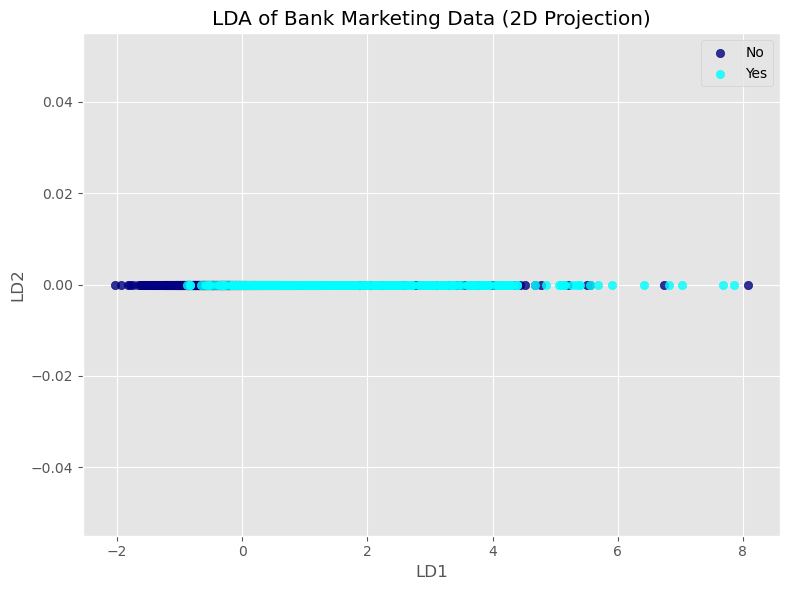

In [46]:
# Author: Hassan Ali
# Problem 8.5 (LDA)
# Dataset: bank.csv (Bank Marketing Data)
# Goal:
#  - The classification target is whether the client subscribes to a term deposit ('yes' or 'no').
#  - Attempt to apply Linear Discriminant Analysis (LDA) with 2 components for a 2D visualization,
#    similar to the wine example. However, **note** that standard LDA for a binary classification
#    problem (yes/no) can produce at most 1 discriminant axis (n_components <= n_classes - 1).
#  - This code tries n_components=2, but if an error occurs (due to only 2 classes), Fall back to
#    n_components=1. In that case, artificially add a second dimension (all zeros) just to allow
#    a 2D scatter plot. This is not a standard LDA approach but provides a 2D plot layout.

#Steps:
#  1) Load and inspect bank.csv (semicolon-separated).
#  2) Identify numeric vs. categorical columns, encode them.
#  3) Split into train/test sets.
#  4) Attempt LDA with n_components=2.
#  5) If an error occurs, revert to n_components=1 and create a dummy second axis.
#  6) Plot the 2D projection, color-coded by 'yes'/'no'.
#  7) Print classification accuracy if desired.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from matplotlib import style
style.use("ggplot")

# STEP 1: LOAD THE DATASET
file_path = "bank.csv"  # Adjust if needed
df = pd.read_csv(file_path, sep=";")  # bank data typically uses ";" as a separator

print("Initial rows of bank.csv:")
print(df.head(), "\n")
print("Columns in dataset:", df.columns.tolist())
print("Shape of the dataset:", df.shape, "\n")

# The target column is "y" with values 'yes' or 'no'
target_col = "y"
if target_col not in df.columns:
    raise KeyError(f"Target column '{target_col}' not found in the dataset.")

# STEP 2: SEPARATE FEATURES AND TARGET
X = df.drop(columns=[target_col]).copy()
y_str = df[target_col].values  # 'yes' or 'no'
# Convert 'yes'/'no' to 1/0
y = np.where(y_str == 'yes', 1, 0)

# Identify numeric vs. categorical columns
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()

print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)

# STEP 3: COLUMN TRANSFORMER
transformers = []
if categorical_cols:
    transformers.append(("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols))
if numeric_cols:
    transformers.append(("num", StandardScaler(), numeric_cols))

col_transformer = ColumnTransformer(transformers=transformers)

# STEP 4: SPLIT DATA INTO TRAIN/TEST
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Fit/transform the data
X_train_enc = col_transformer.fit_transform(X_train)
X_test_enc = col_transformer.transform(X_test)

print("\nShape of transformed training data:", X_train_enc.shape)
print("Shape of transformed test data:", X_test_enc.shape)

# STEP 5: ATTEMPT LDA with n_components=2
lda = LDA(n_components=2)
try:
    lda.fit(X_train_enc, y_train)
    X_lda_train = lda.transform(X_train_enc)
    X_lda_test = lda.transform(X_test_enc)
    print("\nSuccessfully applied LDA with n_components=2.")
    print("Note: For a 2-class problem, the second axis might carry minimal or zero discriminant info.")
except ValueError as e:
    print("\nEncountered error with n_components=2 (likely only 1 dimension possible for 2 classes).")
    print("Falling back to n_components=1 and creating a dummy second axis.\n")
    lda = LDA(n_components=1)
    lda.fit(X_train_enc, y_train)
    # Single dimension
    X_lda_train_1d = lda.transform(X_train_enc)
    X_lda_test_1d = lda.transform(X_test_enc)
    # Create a dummy second axis of all zeros
    X_lda_train = np.hstack([X_lda_train_1d, np.zeros((X_lda_train_1d.shape[0], 1))])
    X_lda_test = np.hstack([X_lda_test_1d, np.zeros((X_lda_test_1d.shape[0], 1))])

# Evaluate classification accuracy
train_preds = lda.predict(X_train_enc)
test_preds = lda.predict(X_test_enc)
train_acc = accuracy_score(y_train, train_preds)
test_acc = accuracy_score(y_test, test_preds)
print(f"Train Accuracy: {train_acc:.3f}, Test Accuracy: {test_acc:.3f}")

# STEP 6: VISUALIZE THE 2D PROJECTION
# Color points by y_train (0=no, 1=yes).
plt.figure(figsize=(8,6))
colors = ["navy", "cyan"]
labels_yn = ["No", "Yes"]

for label_val, color in zip([0, 1], colors):
    mask = (y_train == label_val)
    plt.scatter(X_lda_train[mask, 0], X_lda_train[mask, 1],
                color=color, alpha=0.8, label=labels_yn[label_val])

plt.title("LDA of Bank Marketing Data (2D Projection)")
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.legend(loc="best")
plt.tight_layout()
plt.show()


# - Because there a 2-class classification ('yes'/'no'), standard LDA can produce at most 1 dimension.
# - Set n_components=2 to mimic the "2D visualization" from the Wine example, but if it fails, 
#   Revert to 1D and create a dummy second axis. This allows a 2D scatter layout, but note that 
#  the second axis may not hold actual discriminant information.
# - color-code the scatter plot by the 'yes'/'no' label. 
# - The classification accuracy is printed for reference.
# - This approach follows the style and methodology from the reference notebooks, with thorough comments
#  and a fallback strategy to produce a 2D plot even for a 2-class problem.


In [ ]:
# Analyzing LDA on Bank Marketing Data (2D Visualization with Potential Fallback):

# 1. Two-Class Limitation:
#   - With a binary classification problem (labels = 'yes'/'no'), standard LDA can produce at most one discriminant axis.
#   - Setting `n_components=2` can cause an error in scikit-learn if it strictly enforces the rule that `n_components <= n_classes - 1`.

# 2. Fallback to 1D + Dummy Axis:
#   - The code first attempts `n_components=2`. If a ValueError occurs, it reverts to `n_components=1` and creates a dummy second axis of zeros.
#   - This approach ensures a 2D scatter plot, though the second axis may not carry true discriminant information in the fallback scenario.

# 3. 2D Scatter Plot:
#   - Points are color-coded by the final classification label ('yes' vs. 'no'), using two distinct colors.
#   - If the LDA transformation genuinely produced two axes, might see some separation along both. If it's the fallback scenario, nearly all separation will appear along the first axis.

# 4. Classification Accuracy:
#   - LDA is also used as a classifier, and print training and testing accuracy. This measures how well the single (or effectively single) LDA axis separates 'yes' vs. 'no' classes.
#   - A high accuracy indicates that the primary discriminant axis (LD1) effectively distinguishes between clients who subscribe and those who do not.

# 5. Conclusion:
#   - LDA for a 2-class problem fundamentally yields 1 dimension of discrimination. The second axis in a "2D" plot may be a fallback, so interpret that axis with caution.
#   - Despite this limitation, the color-coded plot still demonstrates how LDA tries to separate the two classes. The classification accuracy confirms how well the linear discriminant boundary performs.
